In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28,28,1).astype("float32")/255
x_test=x_test.reshape(-1,28,28,1).astype("float32")/255
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [4]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [5]:
model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
modelpath=MODEL_DIR+"mnist-cnn.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor="val_loss",
                            verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
# 모델의 실행
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,
                  batch_size=200,
                  callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 30s 505us/step - loss: 0.4890 - accuracy: 0.8460 - val_loss: 0.0810 - val_accuracy: 0.9746

Epoch 00001: val_loss improved from inf to 0.08104, saving model to ./model/mnist-cnn.hdf5
Epoch 2/30
60000/60000 [==============================] - 30s 502us/step - loss: 0.1241 - accuracy: 0.9669 - val_loss: 0.0507 - val_accuracy: 0.9843

Epoch 00002: val_loss improved from 0.08104 to 0.05070, saving model to ./model/mnist-cnn.hdf5
Epoch 3/30
60000/60000 [==============================] - 31s 518us/step - loss: 0.0859 - accuracy: 0.9773 - val_loss: 0.0418 - val_accuracy: 0.9875

Epoch 00003: val_loss improved from 0.05070 to 0.04181, saving model to ./model/mnist-cnn.hdf5
Epoch 4/30
60000/60000 [==============================] - 30s 506us/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.0471 - val_accuracy: 0.9862

Epoch 00004: val_loss did not improve from 0.04181
Epoch 5/30
60000/6

In [14]:
del model

In [15]:
model = load_model('model/mnist-cnn.hdf5')

In [16]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9909


In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

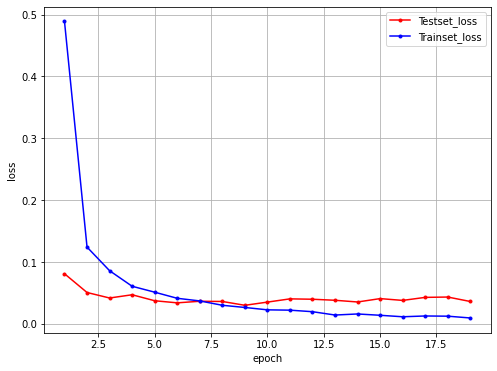

In [13]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()